In [1]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("Website Vistiors Daywise - Sheet1.csv")
pd.set_option('display.max_rows', None)
Data

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
5,06-10-2021,3222
6,07-10-2021,2906
7,08-10-2021,2821
8,09-10-2021,2500
9,10-10-2021,2108


In [3]:
import datetime
date = list()
for d in Data.Date.tolist():
    t = datetime.datetime.strptime(d, "%d-%m-%Y").strftime("%Y-%m-%d")
    date.append(t)
    
Data['date'] = date
Data.drop("Date", axis =1, inplace =True)
Data

,Daily Visitors,date
0,2649,2021-10-01
1,2000,2021-10-02
2,2011,2021-10-03
3,3219,2021-10-04
4,3870,2021-10-05
5,3222,2021-10-06
6,2906,2021-10-07
7,2821,2021-10-08
8,2500,2021-10-09
9,2108,2021-10-10


# EDA and data visualization

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Daily Visitors  173 non-null    int64 
 1   date            173 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
# changing the type of "Date" column from object to datetime
Data["date"]= pd.to_datetime(Data["date"])

check for duplicate rows

In [6]:
duplicate = Data[Data.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Visitors,173.0,2829.907514,765.194741,1245.0,2336.0,2751.0,3207.0,7165.0


In [8]:
Data.columns = ["visitors","date"]
df = Data.set_index("date")

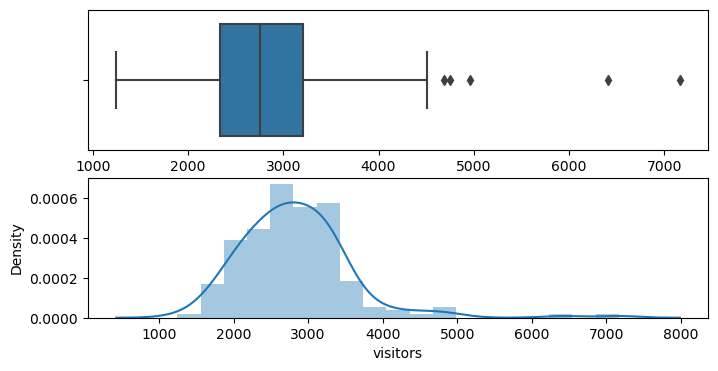

In [9]:
plt.figure(figsize = (8,4))
plt.subplot(211)
sns.boxplot(df.visitors)
plt.subplot(212)
sns.distplot(df.visitors)
plt.show()

In [10]:
df.loc[df['visitors']>=4500]

,visitors
date,
2022-01-20,4509
2022-02-22,6407
2022-02-23,4751
2022-02-24,4961
2022-02-28,7165
2022-03-01,4687


median : 2751.0
3934.400000000001


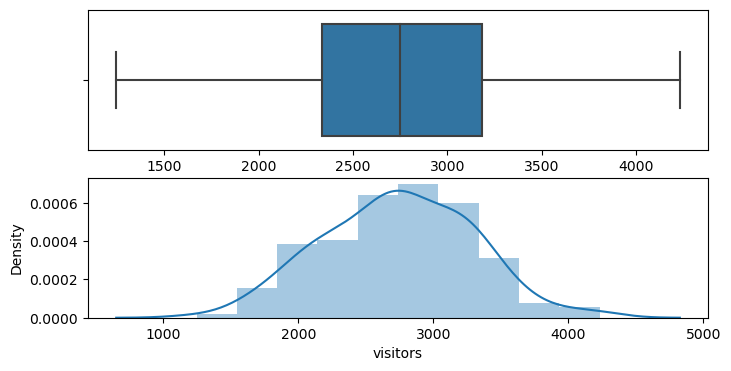

In [11]:
#repacing the outliers with median

print("median :", df['visitors'].quantile(0.50)) 
print(df['visitors'].quantile(0.95)) 
df['visitors'] = np.where(df['visitors'] > 4500, 2751, df['visitors'])
plt.figure(figsize = (8,4))
plt.subplot(211)
sns.boxplot(df.visitors)
plt.subplot(212)
sns.distplot(df.visitors)
plt.show()

In [12]:
df

,visitors
date,
2021-10-01,2649
2021-10-02,2000
2021-10-03,2011
2021-10-04,3219
2021-10-05,3870
2021-10-06,3222
2021-10-07,2906
2021-10-08,2821
2021-10-09,2500


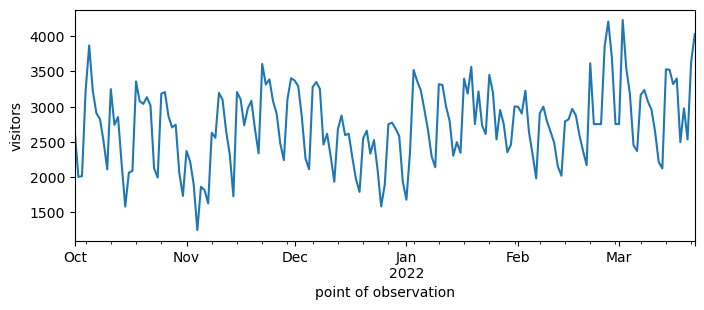

In [13]:
df['visitors'].plot(figsize=(8, 3))
plt.xlabel("point of observation")
plt.ylabel("visitors")
plt.show()

In [14]:
df.isnull().sum()

visitors    0
dtype: int64

In [15]:
df['month'] = df.index.month
df['day'] = df.index.day
df['year'] = df.index.year
df

,visitors,month,day,year
date,,,,
2021-10-01,2649,10,1,2021
2021-10-02,2000,10,2,2021
2021-10-03,2011,10,3,2021
2021-10-04,3219,10,4,2021
2021-10-05,3870,10,5,2021
2021-10-06,3222,10,6,2021
2021-10-07,2906,10,7,2021
2021-10-08,2821,10,8,2021
2021-10-09,2500,10,9,2021


In [16]:
# if the day is a weekend or weekday?
from datetime import datetime
import calendar
      
def weekend_or_weekday(year,month,day):
      
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0
    
df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()

,visitors,month,day,year,weekend
date,,,,,
2021-10-01,2649,10,1,2021,0
2021-10-02,2000,10,2,2021,1
2021-10-03,2011,10,3,2021,1
2021-10-04,3219,10,4,2021,0
2021-10-05,3870,10,5,2021,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   visitors  173 non-null    int64
 1   month     173 non-null    int64
 2   day       173 non-null    int64
 3   year      173 non-null    int64
 4   weekend   173 non-null    int64
dtypes: int64(5)
memory usage: 8.1 KB


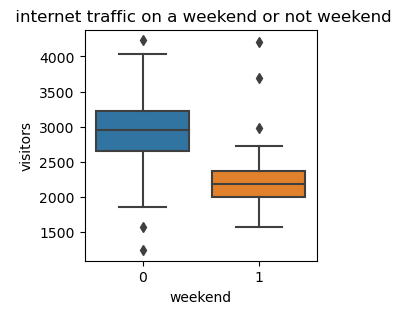

In [18]:
#comparing internet traffic on weekend and working day
plt.figure(figsize = (3,3))
sns.boxplot(x="weekend",y="visitors",data=df)
plt.title(" internet traffic on a weekend or not weekend")
plt.show()

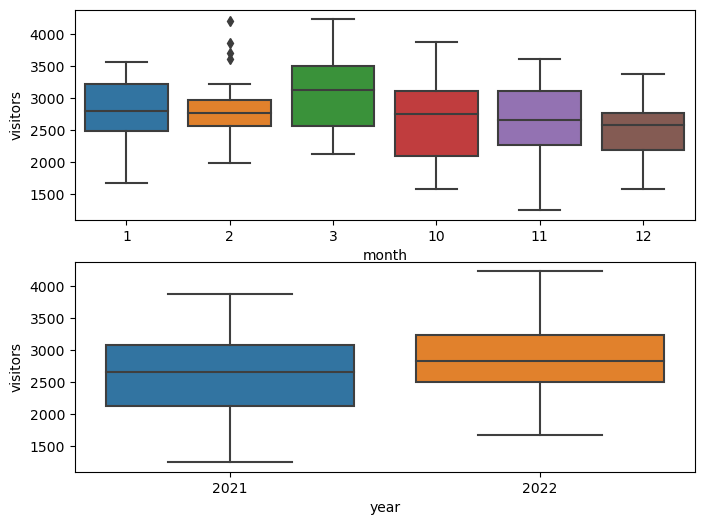

In [19]:
# Boxplots
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="visitors",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="visitors",data=df)
plt.show()

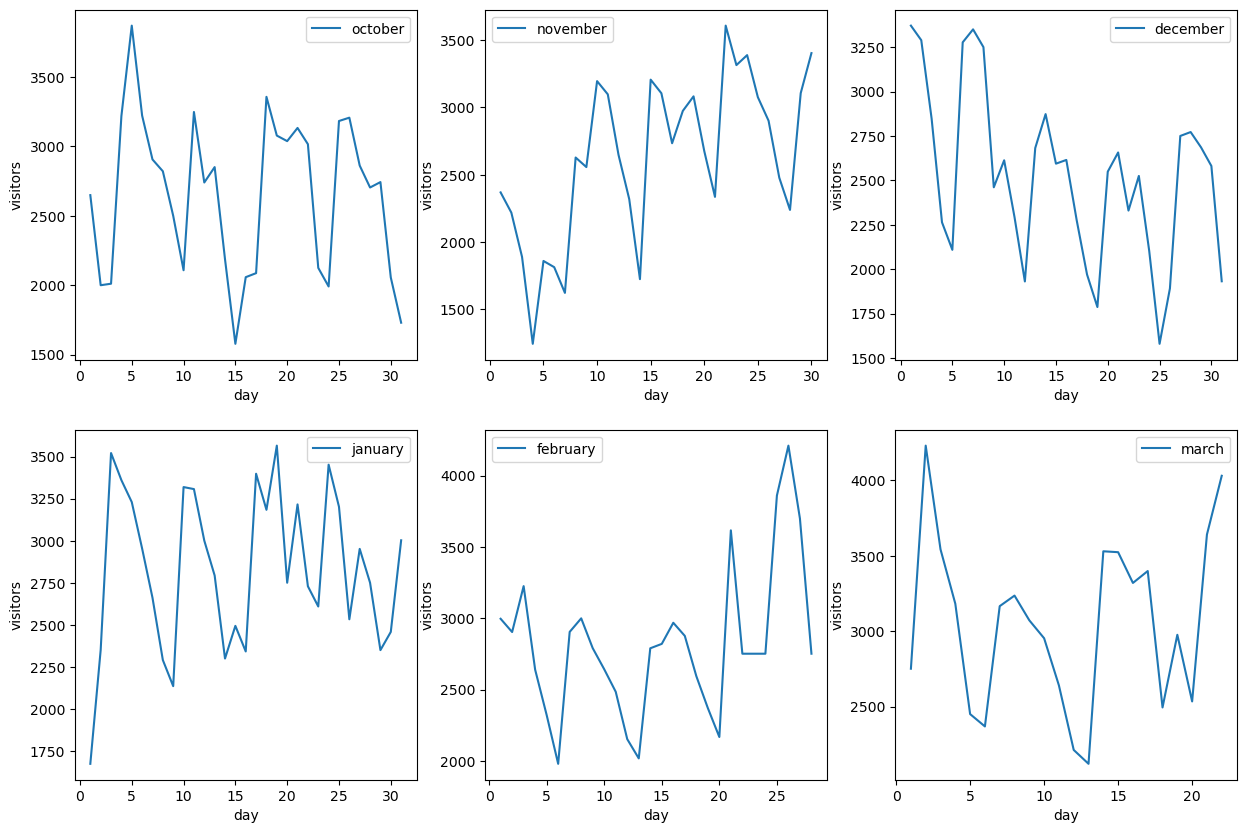

In [54]:
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.lineplot(ax=axes[0, 0], data = df.loc[df["month"]==10].sort_values(by='day'), x='day',y='visitors')
axes[0,0].legend(["october"])
sns.lineplot(ax=axes[0, 1], data = df.loc[df["month"]== 11].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[0, 2], data = df.loc[df["month"]==12].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 0], data = df.loc[df["month"]==1].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 1], data = df.loc[df["month"]==2].sort_values(by='day'), x='day',y='visitors')
sns.lineplot(ax=axes[1, 2], data = df.loc[df["month"]==3].sort_values(by='day'), x='day',y='visitors')
axes[0,1].legend(["november"])
axes[0,2].legend(["december"])
axes[1,0].legend(["january"])
axes[1,1].legend(["february"])
axes[1,2].legend(["march"])
plt.show()

# statistical tests to check if the time series is stationary or not

In [21]:
# Dickey_fuller test to check if the series is stationary or non-stationary

from statsmodels.tsa.stattools import adfuller
res = adfuller(df.visitors,autolag='AIC')
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Lags: %f' % res[2])
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))
print(f'Result: The series is {"not " if res[1] > 0.05 else ""}stationary')

Augmneted Dickey_fuller Statistic: -2.446688
p-value: 0.128990
Lags: 14.000000
critical values at different levels:
	1%: -3.472
	5%: -2.880
	10%: -2.577
Result: The series is not stationary


**Since the p-value obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.The time series is non stationary according to the Augmented Dickey–Fuller test**

In [22]:
#Kwiatkowski-Phillips-Schmidt-Shin(KPSS) test to check if the series is trend stationary
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.visitors, regression="c", nlags="auto")


KPSS Statistic: 0.6185728534990221
p-value: 0.020947922409179802
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


**According to the combined result form the two test, the time series is not stationary, means there is a deterministic trend and seasonalitiy in the series**

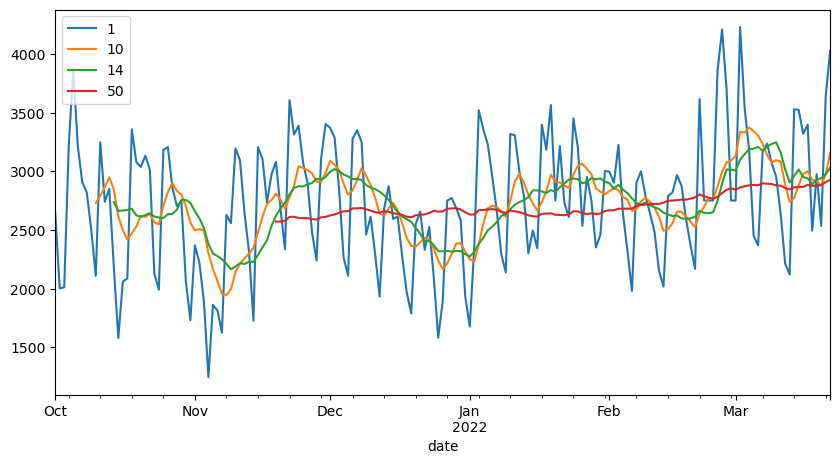

In [23]:
plt.figure(figsize=(10,5))
for i in [1,10,14,50]:
    df["visitors"].rolling(i).mean().plot(label=str(i))
    
plt.legend(loc=2)
plt.show()

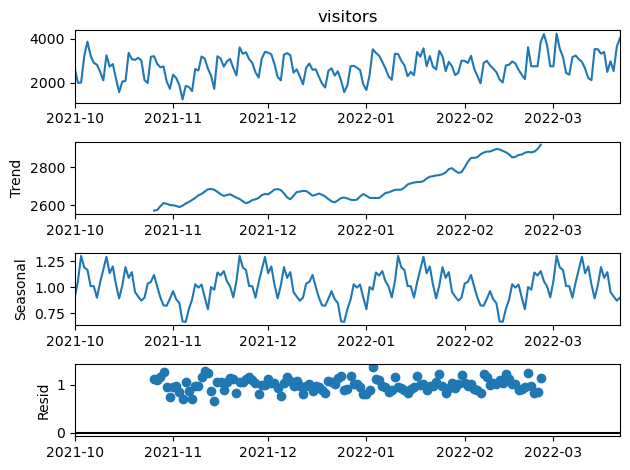

In [24]:
ts_mul = seasonal_decompose(df.visitors,model="multiplicative", period =50)
fig = ts_mul.plot()
plt.show()

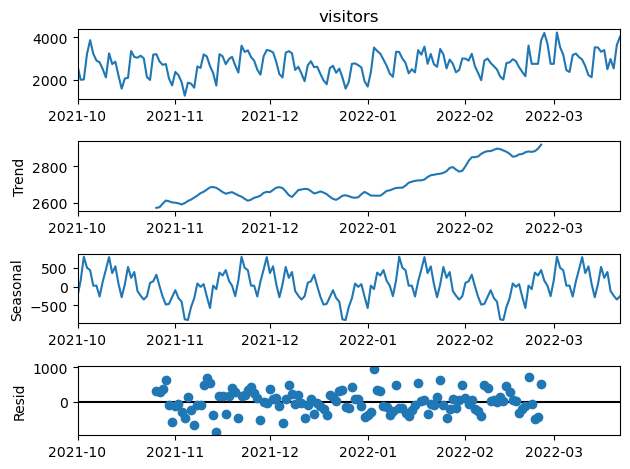

In [25]:
ts_mul = seasonal_decompose(df.visitors,model="additive", period =50)
fig = ts_mul.plot()
plt.show()

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03    2220.000000
2021-10-04    2410.000000
2021-10-05    3033.333333
Name: visitors, dtype: float64


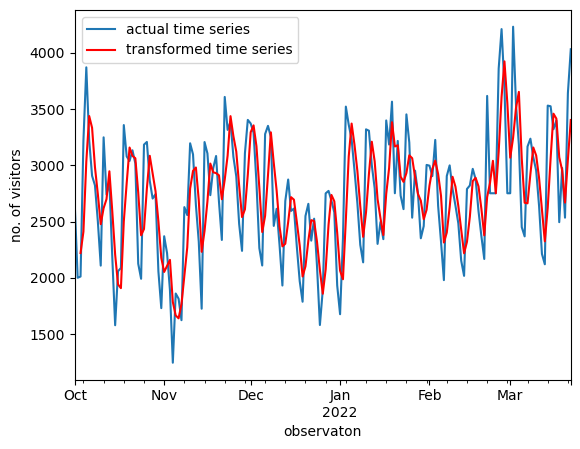

,visitors
date,
2021-10-03,2220.000000
2021-10-04,2410.000000
2021-10-05,3033.333333
2021-10-06,3437.000000
2021-10-07,3332.666667


In [26]:
# Tail-rolling average transform
rolling = df.visitors.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head())
# plot original and transformed dataset
df.visitors.plot()
rolling_mean.plot(color='red')
plt.legend(['actual time series','transformed time series'])
plt.ylabel("no. of visitors")
plt.xlabel("observaton")
plt.show()
df1 = pd.DataFrame(rolling_mean.dropna())
df1.head()

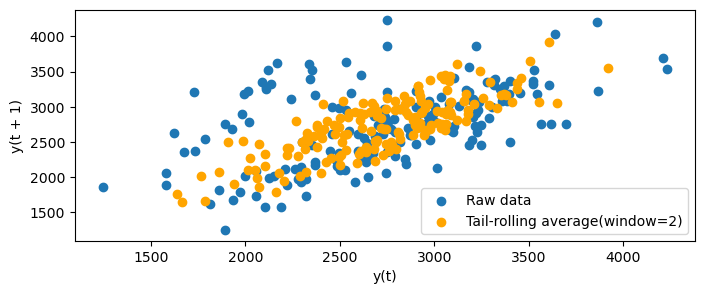

In [27]:
plt.figure(figsize = (8,3))
axes = lag_plot(df.visitors)
lag_plot(df1.visitors,ax=axes, c = 'orange' )
plt.legend(['Raw data', 'Tail-rolling average(window=2)'])
plt.show()

**A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.**

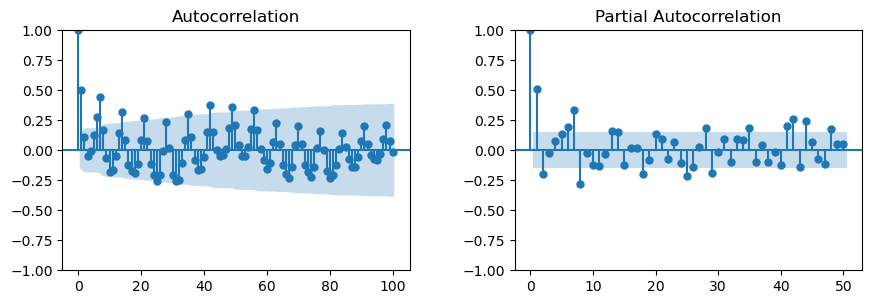

In [28]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
plot_acf(df.visitors,lags=100,ax = ax[0])
plot_pacf(df.visitors,lags=50, ax = ax[1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
plt.show()

# Preparing Dataset for modelling

In [29]:
#splitting the time series obtained after transformation
X = df.visitors
train, test = np.split(X, [int(.67 *len(X))])
print("train dimensions", train.shape)
print("test dimensions", test.shape)

train dimensions (115,)
test dimensions (58,)


# Model building

In [30]:
# evaluation matrix, root mean square error
def rmse(org,pred):
    temp = np.sqrt(np.abs((org-pred)**2))
    return np.mean(temp)

In [31]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add = ExponentialSmoothing(train,seasonal="add",trend="add",seasonal_periods=50).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hw_add_add = np.sqrt(np.abs((test-pred_hwe_add_add)**2)).mean()
print("rmse:", rmse_hw_add_add)

rmse: 612.5343632642932


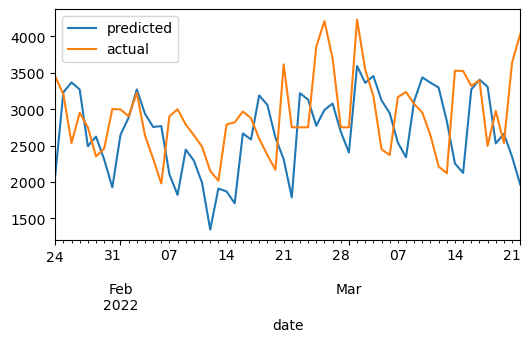

In [32]:
plt.figure(figsize = (6,3))
pred_hwe_add_add.plot()
test.plot()
plt.legend(['predicted', 'actual'])
plt.show()

In [33]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train,seasonal="mul",trend="add",seasonal_periods=50).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hw_mul_add = np.sqrt(np.abs((test-pred_hwe_mul_add)**2)).mean()
print("rmse:", rmse)

rmse: <function rmse at 0x000001E999F0A790>


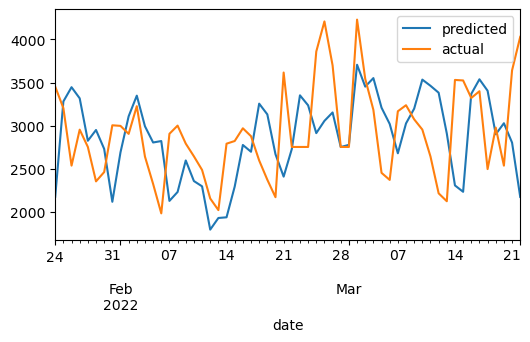

In [34]:
plt.figure(figsize = (6,3))
pred_hwe_mul_add.plot()
test.plot()
plt.legend(['predicted', 'actual'])
plt.show()

In [35]:
# Auto regression model
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
# contrived dataset
# fit model
model = AutoReg(train, lags=20)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse_AR = np.sqrt(np.abs((test-yhat)**2)).mean()
print("rmse:", rmse_AR)

rmse: 362.96774029839185


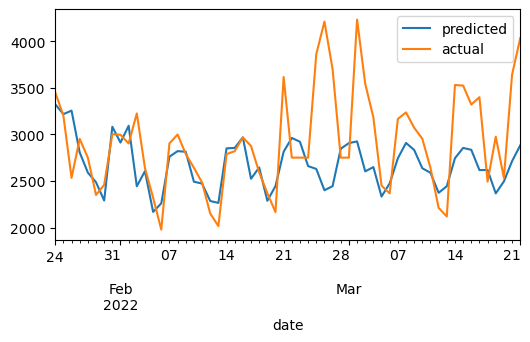

In [36]:
plt.figure(figsize = (6,3))
yhat.plot()
test.plot()
plt.legend(['predicted', 'actual'])
plt.show()

# ARIMA: Auto Regressive Integrated Moving Average model
p is the order of the AR term  
q is the order of the MA term  
d is the number of differencing required to make the time series stationary

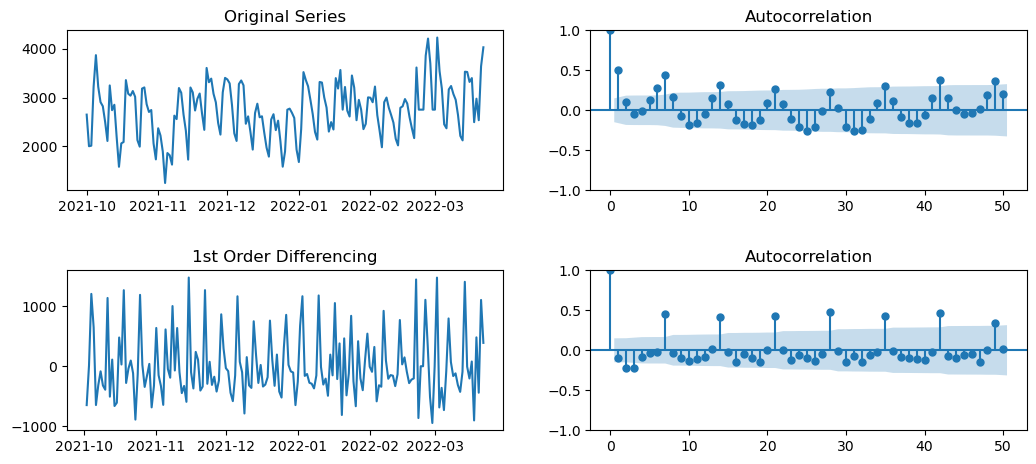

In [37]:
#The first step to build an ARIMA model is to make the time series stationary.
#The value of d, therefore, is the minimum number of differencing needed to make the series stationary.
#And if the time series is already stationary, then d = 0.
#======================================================================================================

#original series
fig, axes = plt.subplots(2, 2,figsize = (12,5), sharex=False)
axes[0, 0].plot(X); axes[0, 0].set_title('Original Series')
plot_acf(X, lags = 50, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(X.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(X.diff().dropna(),lags = 50 ,ax=axes[1, 1])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.5)

plt.show()


**order of differcing i.e., d = 1**

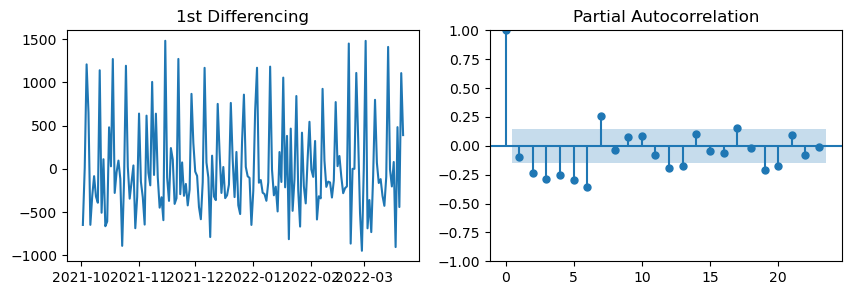

In [38]:
#finding p
fig, axes = plt.subplots(1, 2, figsize = (10,3), sharex=False)
axes[0].plot(X.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(X.diff().dropna(), ax=axes[1])
plt.show()

**number of lags above the significance level. here it is 1**

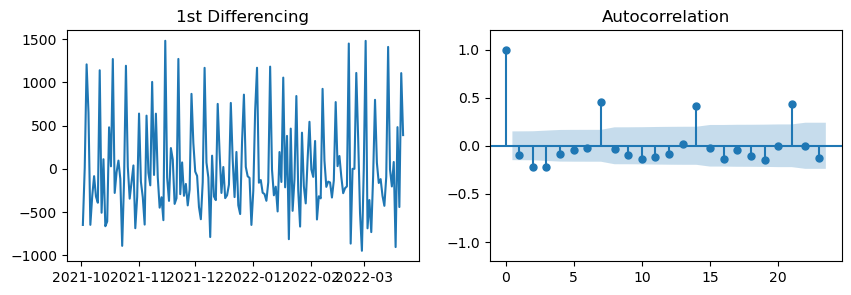

In [39]:
# q value
fig, axes = plt.subplots(1, 2, figsize = (10,3), sharex=False)
axes[0].plot(X.diff()); axes[0].set_title('1st Differencing')
plot_acf(X.diff().dropna(), ax=axes[1])
axes[1].set(ylim=(-1.2,1.2))
plt.show()

no. of lags above significance level, q =1

                               SARIMAX Results                                
Dep. Variable:               visitors   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1306.455
Date:                Mon, 04 Sep 2023   AIC                           2618.911
Time:                        15:28:23   BIC                           2628.353
Sample:                    10-01-2021   HQIC                          2622.742
                         - 03-22-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5010      0.078      6.440      0.000       0.349       0.654
ma.L1         -0.9739      0.031    -31.406      0.000      -1.035      -0.913
sigma2      2.287e+05   2.51e+04      9.111      0.0

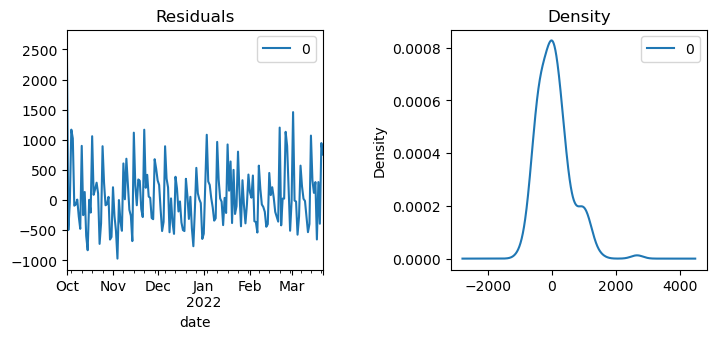

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize = (8,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5)
plt.show()

In [41]:
#auto ARIMA
import pmdarima as pm
model = pm.auto_arima(X, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2627.606, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2680.975, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2630.386, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2630.509, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3238.438, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2627.605, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2625.513, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2627.317, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2629.310, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2677.391, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.886 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -859.346
Date:                Mon, 04 Sep 2023   AIC                           1726.692
Time:                        15:29:20   BIC                           1737.637
Sample:                             0   HQIC                          1731.134
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2648.1491     91.022     29.093      0.000    2469.748    2826.550
ar.L1          0.6371      0.119      5.347      0.000       0.404       0.871
ar.L2         -0.2127      0.111     -1.921      0.0

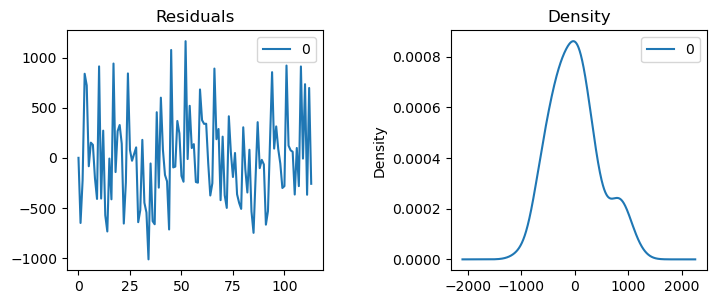

In [47]:
from statsmodels.tsa.arima.model import ARIMA
x = X.values
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
model = ARIMA(train, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize = (8,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5)
plt.show()

Test RMSE: 590.671


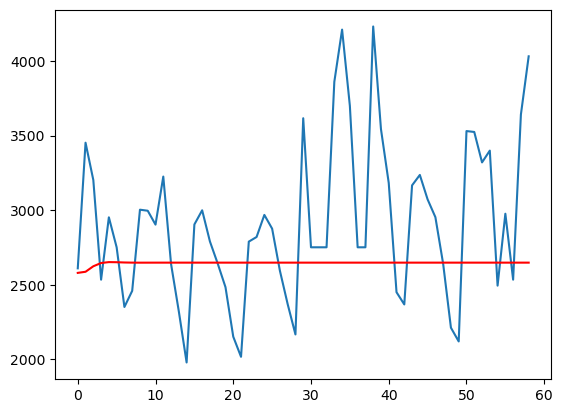

In [48]:
result = model_fit.forecast(len(test))
result = pd.Series(result)
# evaluate forecasts
rmse_ARIMA = sqrt(mean_squared_error(test, result))
print('Test RMSE: %.3f' % rmse_ARIMA)
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
plt.figure()
plt.plot(test)
plt.plot(result,color = 'red')
plt.show()

# Rolling Forecast ARIMA Model

Test RMSE: 494.261


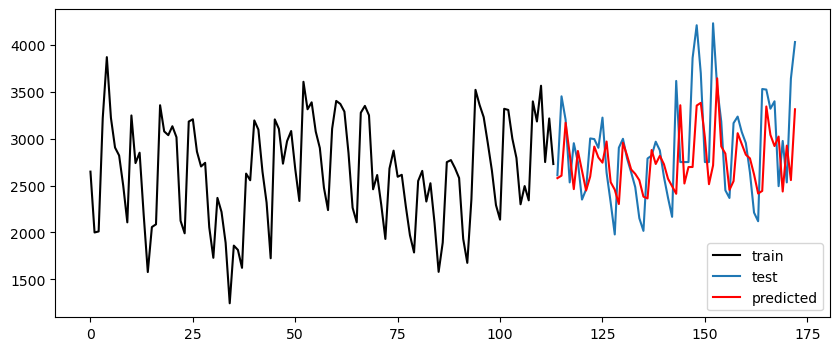

In [49]:
x = X.values
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
history = [n for n in train]
predictions = list()
future_steps = len(test)
# ARIMA with walk-forward validation
for t in range(future_steps):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts
rmse_rolling_ARIMA = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse_rolling_ARIMA)

# make as panda series
fc_series = pd.Series(predictions, index=list(range(len(train), len(history))))
test_series = pd.Series(test, index=list(range(len(train), len(history))))

# plot forecasts against actual outcomes
plt.figure(figsize = (10,4))
plt.plot(train,color='black')
plt.plot(test_series)
plt.plot(fc_series, color='red')
plt.legend(['train','test','predicted'])
plt.show()


In [45]:
#SARIMA model
smodel = pm.auto_arima(X, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2577.519, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2492.790, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2575.639, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2526.724, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2474.099, Time=0.42 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2539.955, Time=0.36 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2476.065, Time=0.58 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=2475.991, Time=0.92 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=2489.916, Time=0.36 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=2476.107, Time=1.25 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=2472.625, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  173
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 7)   Log Likelihood               -1213.196
Date:                           Mon, 04 Sep 2023   AIC                           2440.393
Time:                                   15:28:57   BIC                           2462.177
Sample:                               10-01-2021   HQIC                          2449.235
                                    - 03-22-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4007      0.153      9.155      0.000       1.101       1.701
ar.L2         -0.4242      0.118     -3.580      0.000      -0.656      -0.192
ma.L1         -0.8267      0.132     -6.242      0.000      -1.086      -0.567
ar.S.L7       -0.0922      0.108     -0.851      0.395      -0.305       0.120
ar.S.L14      -0.1359      0.108     -1.259      0.208      -0.347       0.076
ma.S.L7       -0.9116      0.090    -10.179      0.000      -1.087      -0.736
sigma2      1.192e+05   8405.616     14.180      0.000    1.03e+05    1.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                91.99
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test RMSE: 446.865


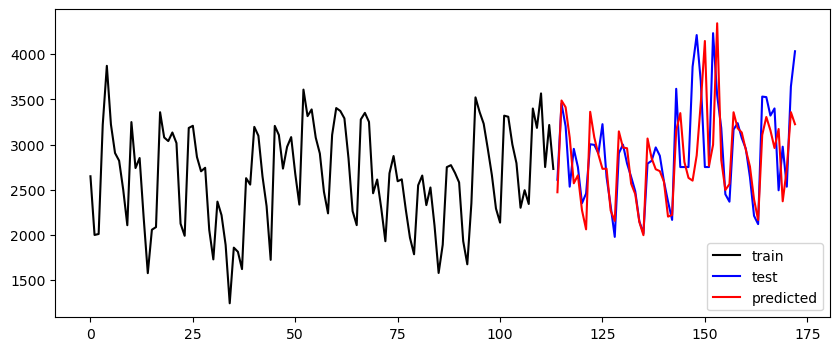

In [50]:
import statsmodels.api as sm
# one-step sarima forecast
x = X.values
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
history = [n for n in train]
predictions = list()
future_steps = len(test)
# ARIMA with walk-forward validation
for t in range(future_steps):
    model = model=sm.tsa.statespace.SARIMAX(history, order=(5,0,1), seasonal_order=(2,1,1,7))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts
rmse_rollong_SARIMA = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse_rollong_SARIMA)

# make as panda series
fc_series = pd.Series(predictions, index=list(range(len(train), len(history))))
test_series = pd.Series(test, index=list(range(len(train), len(history))))

# plot forecasts against actual outcomes
plt.figure(figsize = (10,4))
plt.plot(train,color='black')
plt.plot(test_series, color='blue')
plt.plot(fc_series, color='red')
plt.legend(['train','test','predicted'])
plt.show()

# Model evaluation

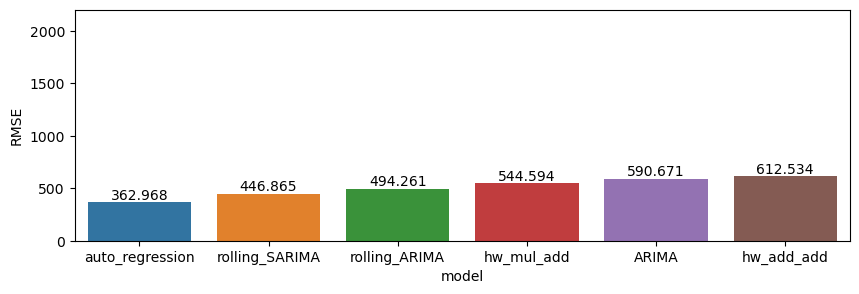

In [51]:
model_evaluation = {'hw_add_add':rmse_hw_add_add,'hw_mul_add':rmse_hw_mul_add,'auto_regression':rmse_AR,
                    'ARIMA':rmse_ARIMA,'rolling_ARIMA':rmse_rolling_ARIMA,'rolling_SARIMA': rmse_rollong_SARIMA}
results = pd.DataFrame(data = model_evaluation, index = range(1)).T.reset_index()
results.columns = ['model','RMSE']
results = results.sort_values(by='RMSE')
plt.figure(figsize=(10,3))
ax = sns.barplot(x = results.model,y=results.RMSE, data=results)
plt.ylim(0,2200)
for i in ax.containers:
    ax.bar_label(i,)

# Final model